<a href="https://colab.research.google.com/github/ROHAN010501/Realestate_price_prediction/blob/main/Realestate_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Realestate Price Prediction Model 🏡🏠

### Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

### Loading the dataset

In [ ]:
df0 = pd.read_csv(r"https://github.com/ROHAN010501/data/raw/main/realestate.csv")
df = df0.copy()

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
#shape of dataset
df.shape

(414, 8)

In [ ]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
#check for duplicates
df.duplicated().sum()

0

In [ ]:
#checking for null values
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

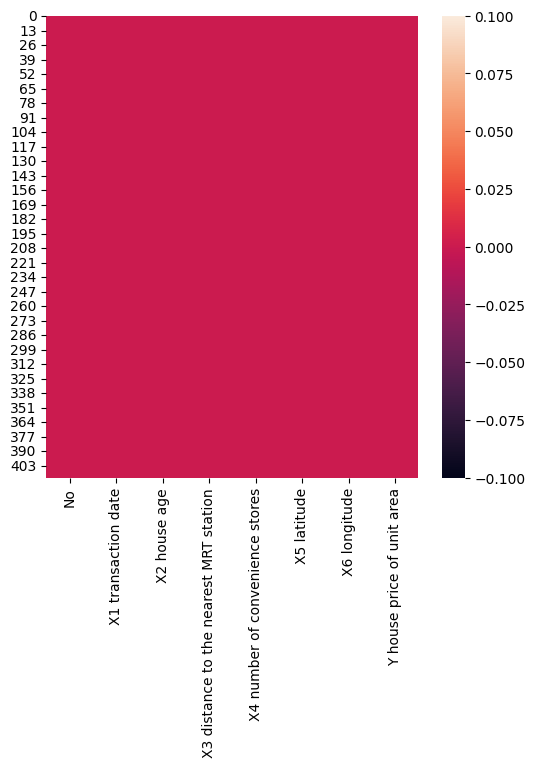

In [ ]:
#using heatmap to show if there are any null values
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull())
plt.show()

There are no null values and no duplicate values as well.

### EDA and Visualizations

In [ ]:
# columns od dataset
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
#checking unique values
df.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In [ ]:
#the transaction date needs to be coverted properly we will retutn only year as month abd date is not clear
def return_year(x):
    text = str(x)
    year = int(text[:4])
    return year

df['X1 transaction date'] = df['X1 transaction date'].apply(return_year)

In [ ]:
#removing 'No' column as it doesn't give any additional information
df.drop('No',axis=1,inplace=True)

In [ ]:
#data description
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


   X1 transaction date  count
0                 2013    288
1                 2012    126


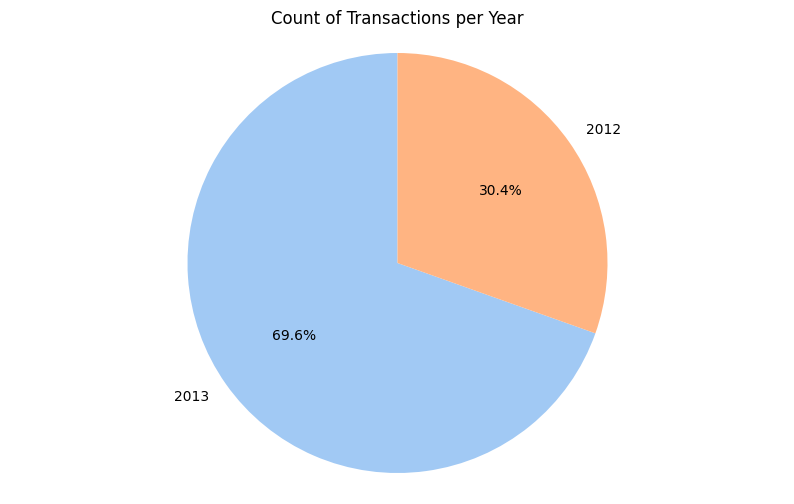

In [ ]:
#visualising the count of transactions per year using pie plot
print(df['X1 transaction date'].value_counts().reset_index())
plt.figure(figsize=(10,6))
plt.pie(df['X1 transaction date'].value_counts(), startangle=90, labels=['2013','2012'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Count of Transactions per Year')
plt.axis('equal')
plt.show()

     X2 house age  count
0             0.0     17
1            13.6      7
2            13.3      6
3            16.2      6
4            16.4      6
..            ...    ...
231          30.2      1
232           4.3      1
233          24.0      1
234           8.4      1
235          18.8      1

[236 rows x 2 columns]


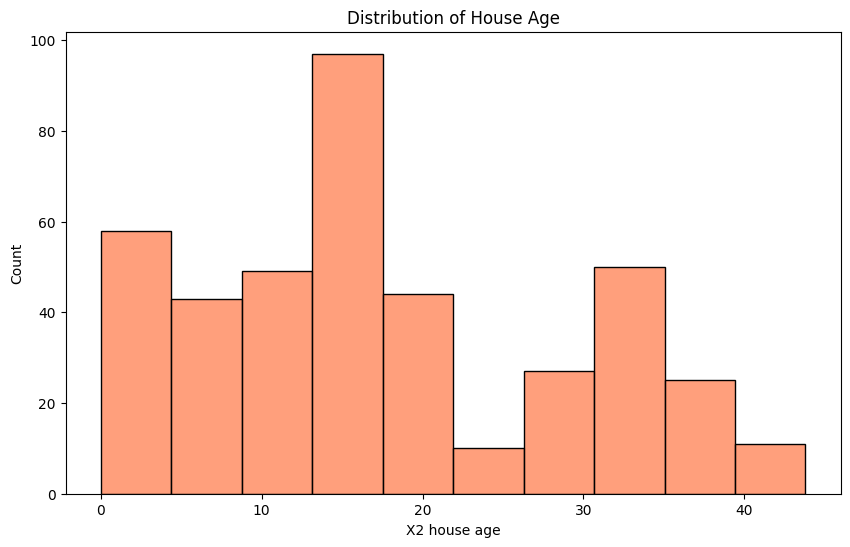

In [ ]:
#visualizing house age using histplot

print(df['X2 house age'].value_counts().reset_index())

plt.figure(figsize=(10,6))
plt.title('Distribution of House Age')
sns.histplot(x='X2 house age',data=df, color='coral')
plt.show()


     X3 distance to the nearest MRT station  count
0                                 289.32480     13
1                                  90.45606     11
2                                 492.23130      9
3                                1360.13900      8
4                                 104.81010      8
..                                      ...    ...
254                              4527.68700      1
255                               401.88070      1
256                               432.03850      1
257                               472.17450      1
258                               390.96960      1

[259 rows x 2 columns]


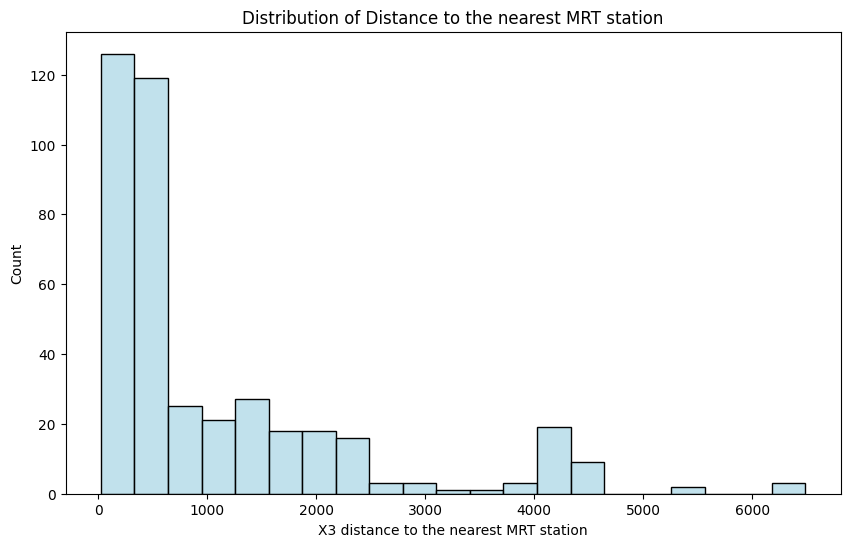

In [ ]:
#visualizing distribution of distance to the nearest MRT station using histplot

print(df['X3 distance to the nearest MRT station'].value_counts().reset_index())

plt.figure(figsize=(10,6))
plt.title('Distribution of Distance to the nearest MRT station')
sns.histplot(x='X3 distance to the nearest MRT station',data=df, color='lightblue')
plt.show()

    X4 number of convenience stores  count
0                                 5     67
1                                 0     67
2                                 3     46
3                                 1     46
4                                 6     37
5                                 7     31
6                                 4     31
7                                 8     30
8                                 9     25
9                                 2     24
10                               10     10


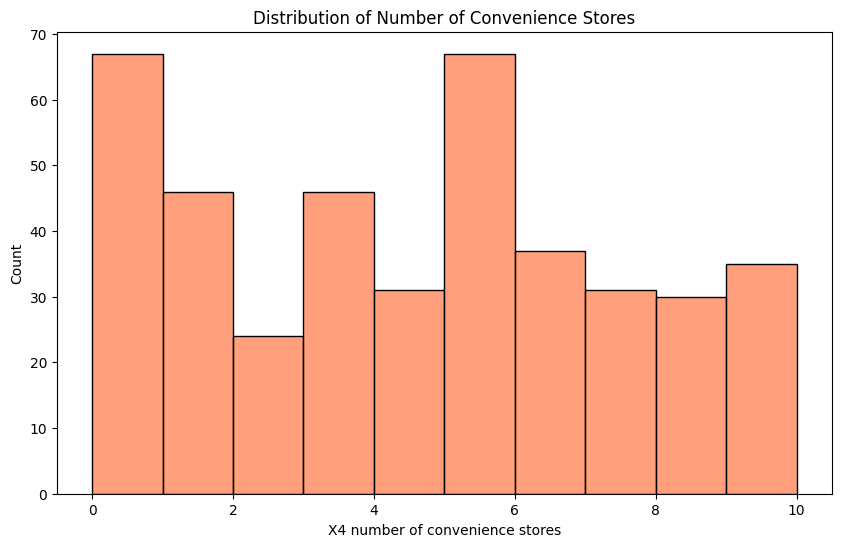

In [ ]:
#visualizing distribution of number of convenience stores

print(df['X4 number of convenience stores'].value_counts().reset_index())

plt.figure(figsize=(10,6))
plt.title('Distribution of Number of Convenience Stores')
sns.histplot(x='X4 number of convenience stores',data=df, color='coral')
plt.show()

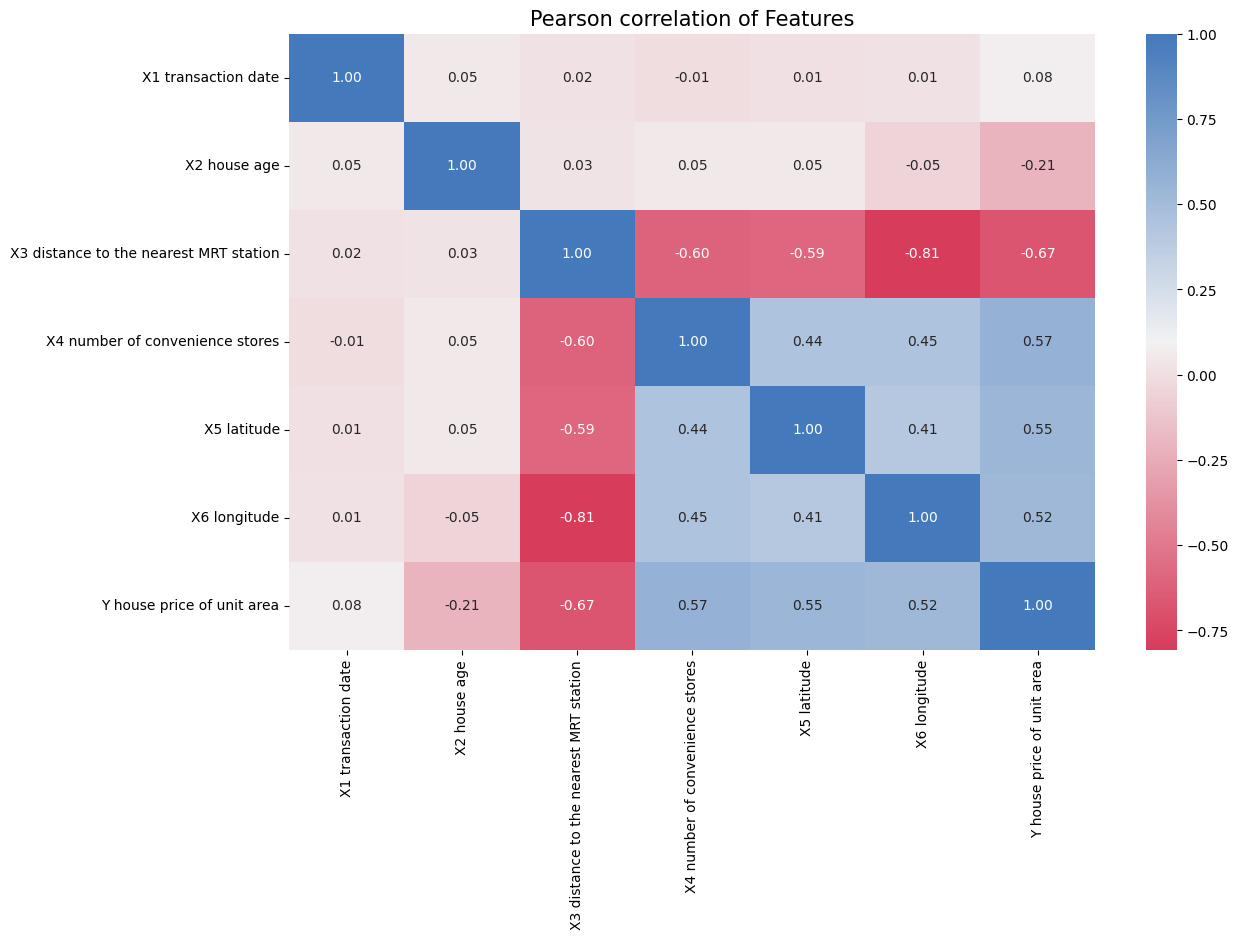

In [ ]:
#pearson correlation map

corr = df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize=(13, 8))
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
plt.title('Pearson correlation of Features',fontsize=15)
plt.show()

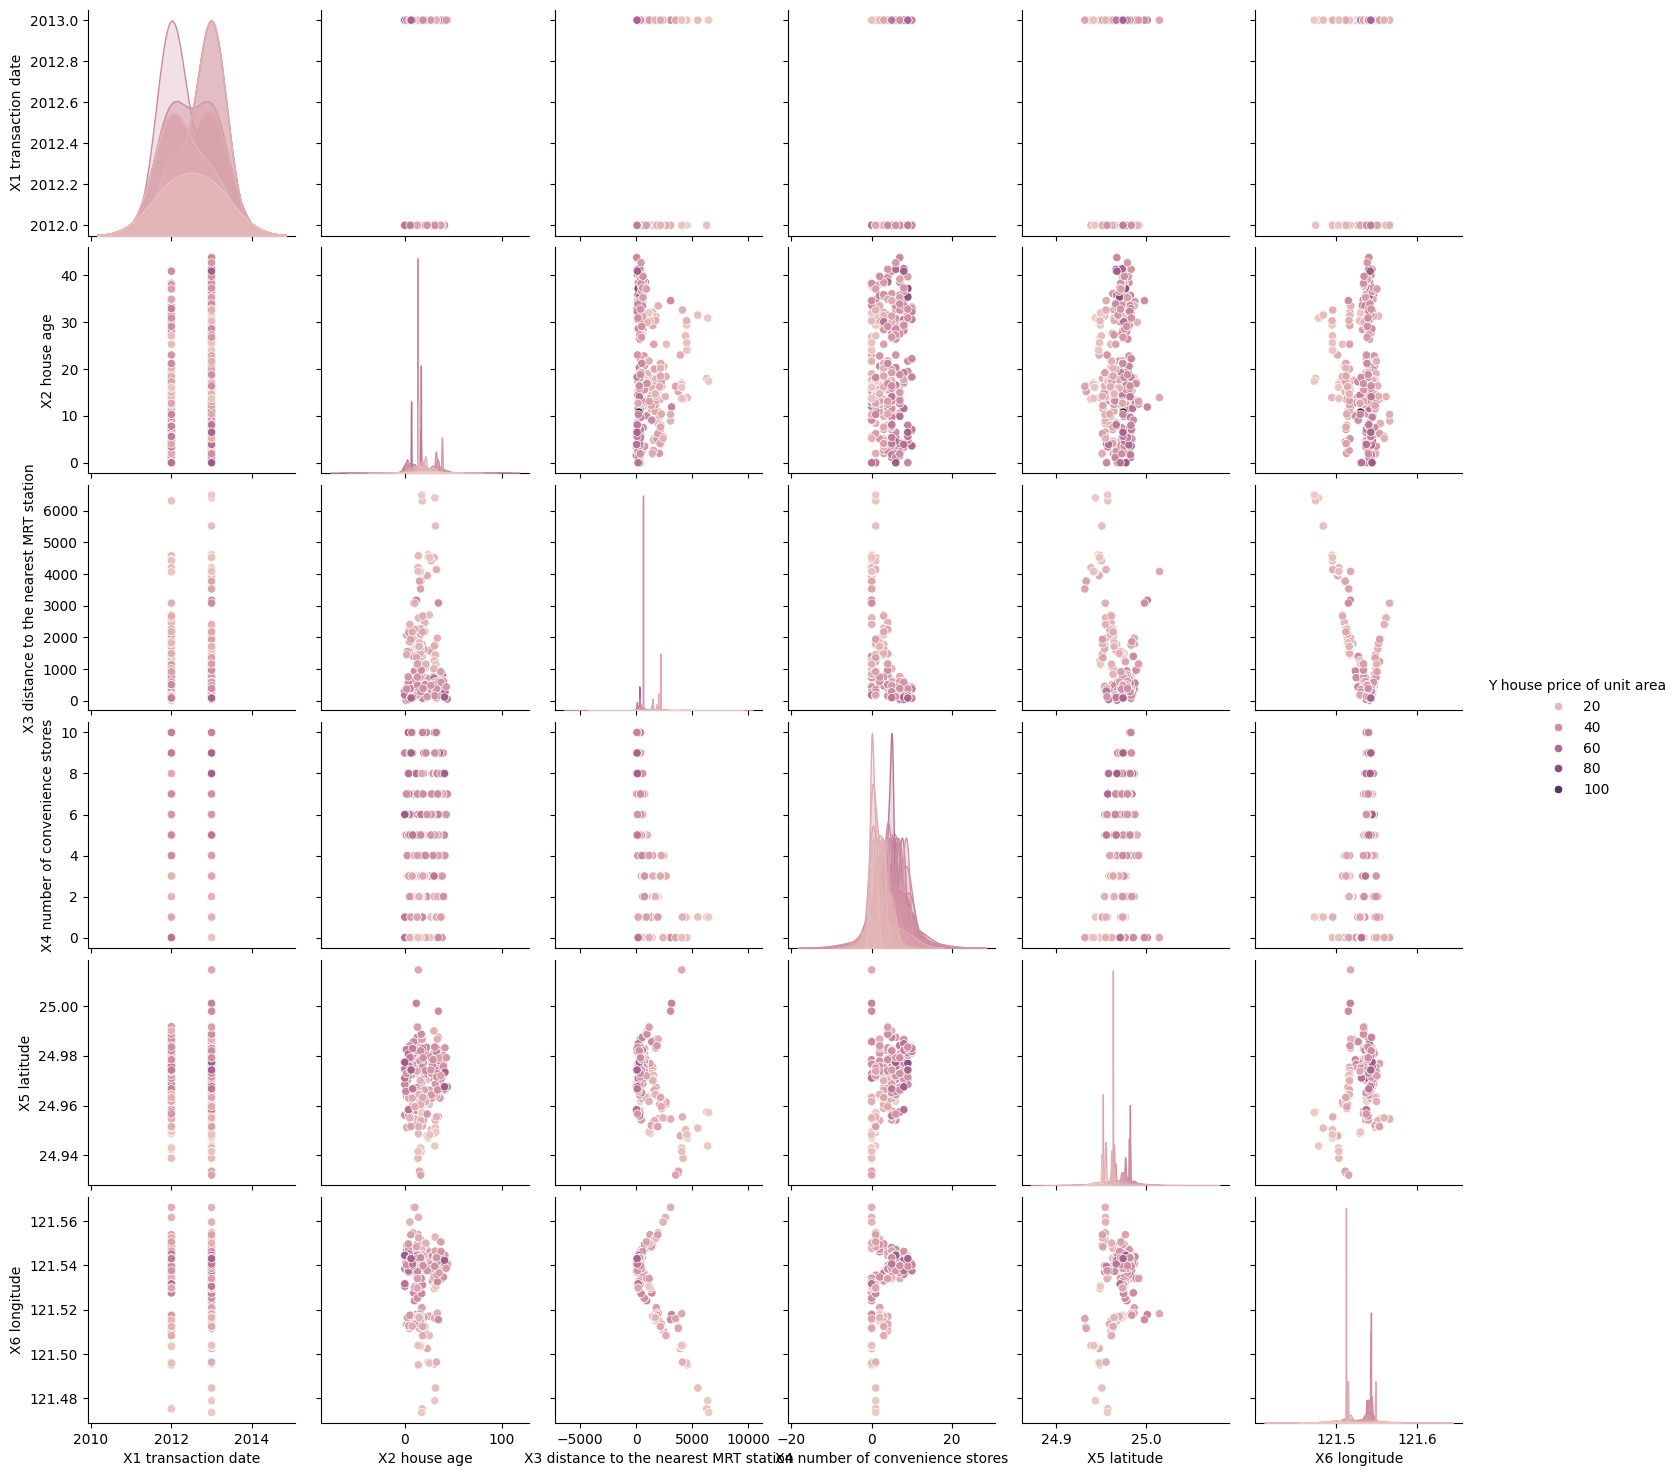

In [ ]:
#plotting pairplot
sns.pairplot(df,hue='Y house price of unit area')
plt.show()

### Handling the Outliers

In [ ]:
# IQR outlier removal technique
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply the function to numeric columns
numeric_columns = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']

for column in numeric_columns:
    df = remove_outliers_iqr(df, column)

# Display the DataFrame after outlier removal
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


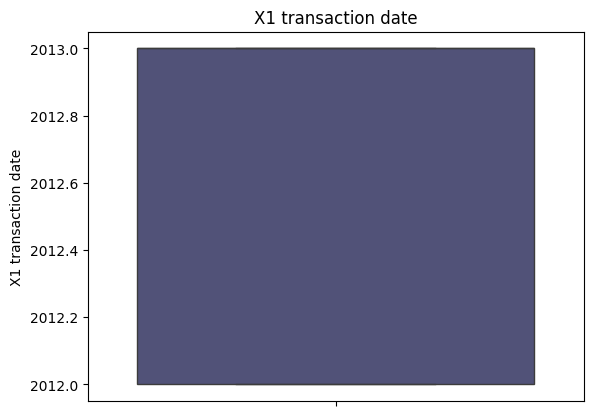

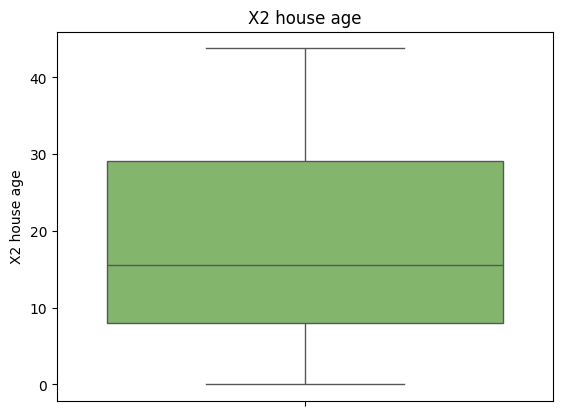

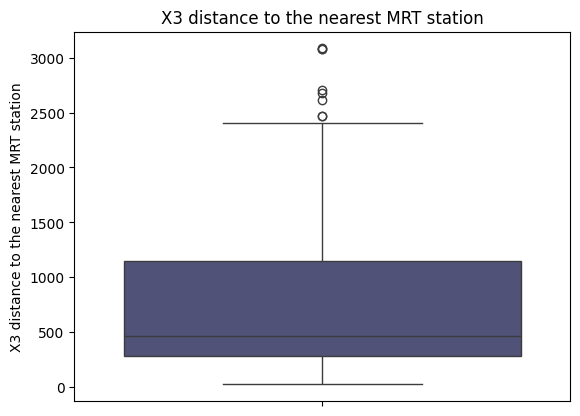

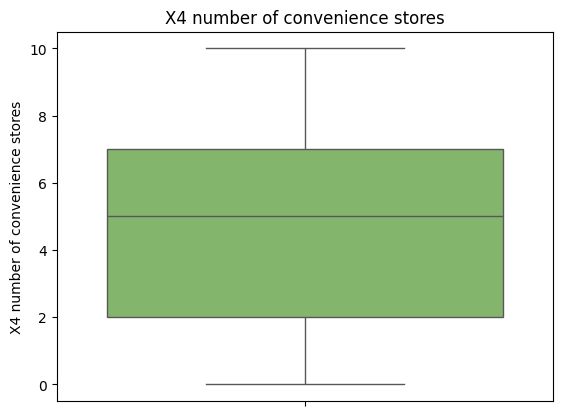

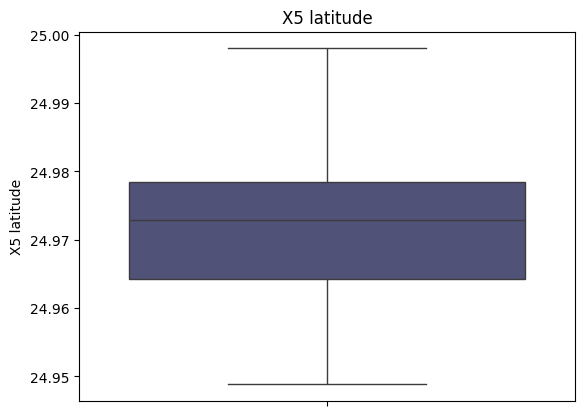

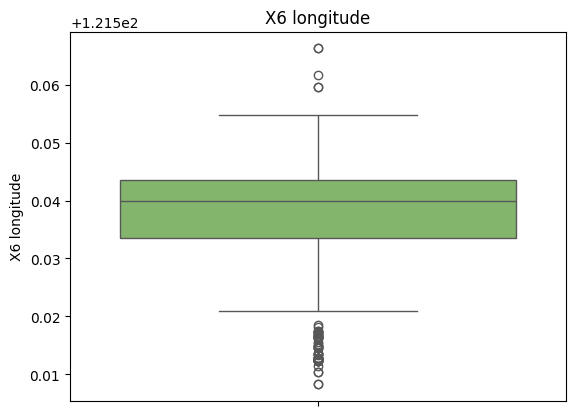

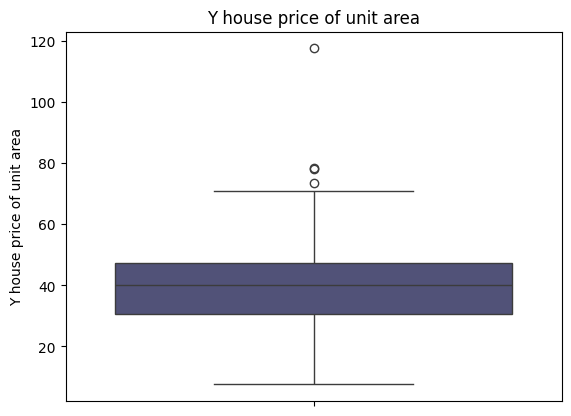

In [ ]:
colors_ = ['#4a4c7e','#80c161']*round(len(df.columns)/2+1)
i = 0
for var in df.columns:
    sns.boxplot(y=var, data=df, color=colors_[i])
    plt.title(var)
    plt.show()
    i+=1

In [ ]:
#removing the outliers of the column 'Y house price of unit area'
df = df[df['Y house price of unit area'] <= 75]

### Categorical Encoding

In [ ]:
#Encode categorical columns
df = pd.get_dummies(df, columns=['X1 transaction date'])

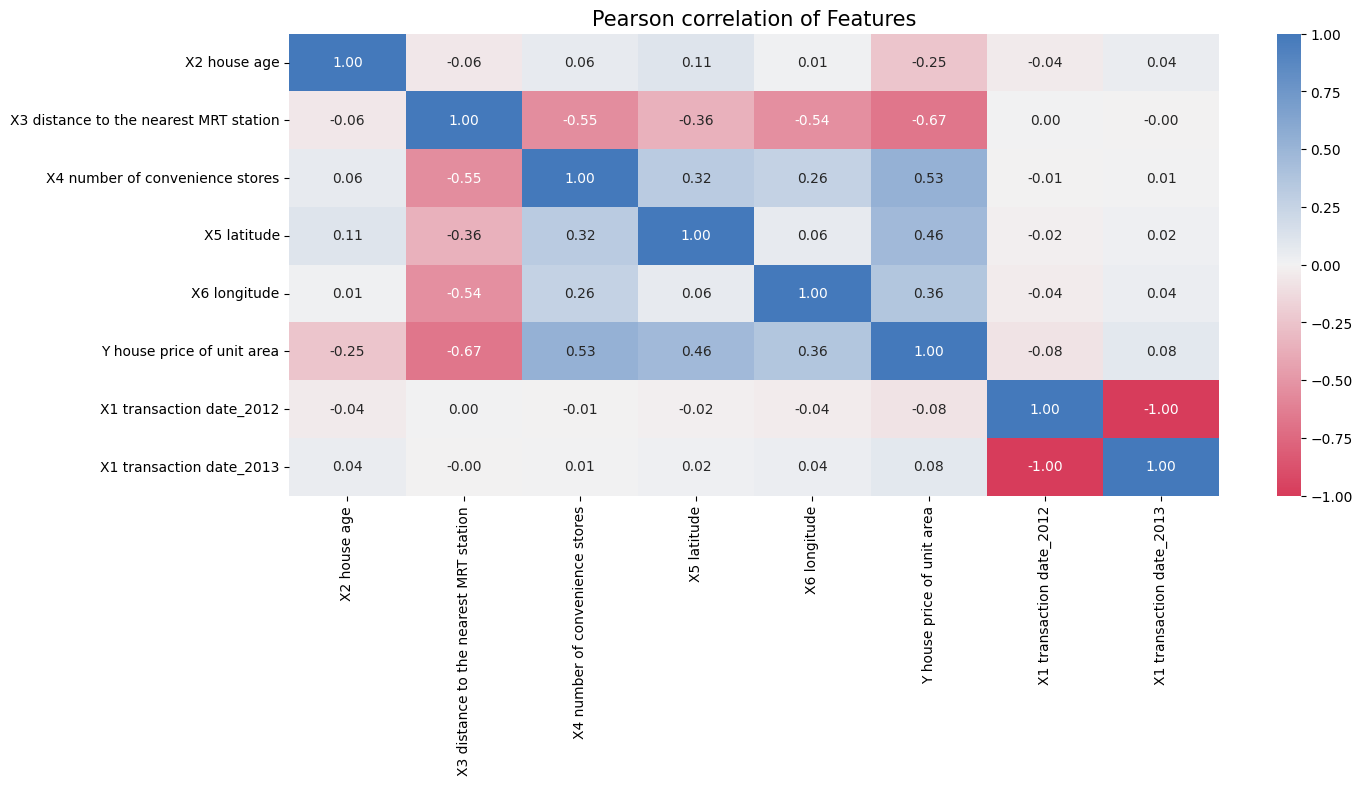

In [ ]:
#pearson correlation map
corr_1 = df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize=(15, 6))
sns.heatmap(corr_1, cmap=cmap, annot=True, fmt=".2f")
plt.title('Pearson correlation of Features',fontsize=15)
plt.show()

### Data Splitting

In [ ]:
#contains all dependent variables
X = df.drop(['Y house price of unit area'], axis=1)

#contains dependent variable
y = df['Y house price of unit area']

#splitting in training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"X train Shape: {X_train.shape}")
print(f"X test Shape: {X_test.shape}")
print(f"y train Shape: {y_train.shape}")
print(f"y test Shape: {y_test.shape}")

X train Shape: (298, 7)
X test Shape: (75, 7)
y train Shape: (298,)
y test Shape: (75,)


### Data Scaling

In [ ]:
# Scaling Independent variables
# using Standardscaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:
# Scaling Dependent variable
# using Standardscaler
scaler_y = StandardScaler()
# transform 1D to 2D
y_train_array = y_train.values.reshape(-1,1)
y_train_og = y_train
# transform y_train
y_train_scaled = scaler_y.fit_transform(y_train_array)

y_train = y_train_scaled[:,0]

### ML model Training

##### Model 1 - LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"The models coefficients are: {model.coef_}")
print(f"The models intercept is: {model.intercept_}")

The models coefficients are: [-0.27648302 -0.47729133  0.20025938  0.24580068  0.06643361 -0.05282982
  0.05282982]
The models intercept is: 1.0899024259550304e-13


In [ ]:
#predict for train data
y_pred_for_train = model.predict(X_train)
y_pred_for_train = y_pred_for_train.reshape(-1,1)
y_pred_for_train = scaler_y.inverse_transform(y_pred_for_train)

In [ ]:
#predict test data
y_pred_test = model.predict(X_test)
y_pred_test = y_pred_test.reshape(-1,1)
y_pred_test = scaler_y.inverse_transform(y_pred_test)

In [ ]:
#comparing the metrics for train and test

mse_for_train = mean_squared_error(y_train_og, y_pred_for_train)
mse_for_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train_og,y_pred_for_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features (1 in this case)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Mean Squared Error for train:", mse_for_train)    ### To check if the model is underfitting or overfitting
print("Mean Squared Error for test:", mse_for_test)
print(f"MAE for train: {mae_train:.2f}")
print(f"MAE for test: {mae_test:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"Adjusted R-Squared {adjusted_r2:.2f}")

Mean Squared Error for train: 47.89425414937507
Mean Squared Error for test: 55.412588707764456
MAE for train: 5.07
MAE for test: 5.75
R-Squared: 0.62
Adjusted R-Squared 0.58


In [ ]:
model_1_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test.ravel()})

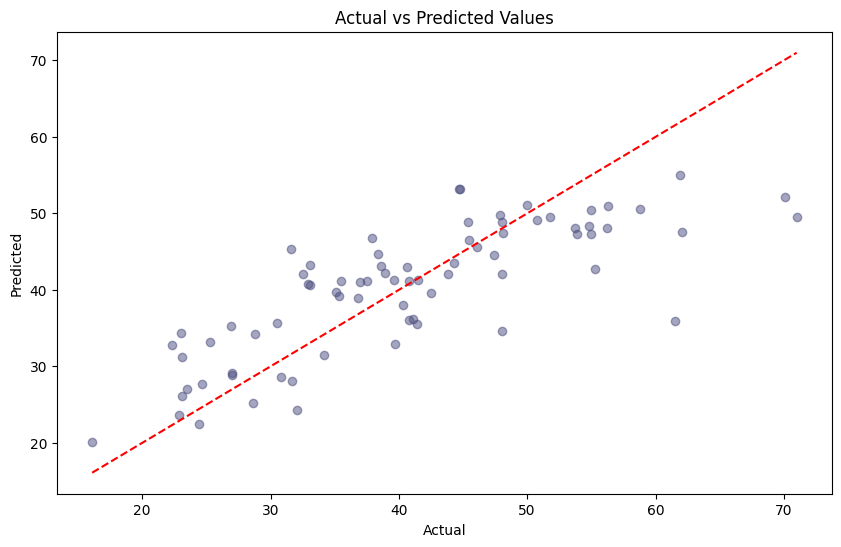

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(model_1_df['Actual'], model_1_df['Predicted'], alpha=0.5, color = "#4a4c7e")
plt.plot([model_1_df['Actual'].min(), model_1_df['Actual'].max()], [model_1_df['Actual'].min(), model_1_df['Actual'].max()], 'r--')  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### Model 2 - Lasso Regression

In [ ]:
model_2 = Lasso(alpha=0.03)
model_2.fit(X_train, y_train)

Lasso(alpha=0.03)

In [ ]:
#predict for train data
y_pred_train_ls = model_2.predict(X_train)
y_pred_train_ls = y_pred_train_ls.reshape(-1,1)
y_pred_train_ls = scaler_y.inverse_transform(y_pred_train_ls)

In [ ]:
#predict test data
y_pred_test_ls = model_2.predict(X_test)
y_pred_test_ls = y_pred_test_ls.reshape(-1,1)
y_pred_test_ls = scaler_y.inverse_transform(y_pred_test_ls)

In [ ]:
#comparing the metrics for train and test

mse_for_train = mean_squared_error(y_train_og, y_pred_train_ls)
mse_for_test = mean_squared_error(y_test, y_pred_test_ls)
mae_train = mean_absolute_error(y_train_og,y_pred_train_ls)
mae_test = mean_absolute_error(y_test, y_pred_test_ls)
r2 = r2_score(y_test, y_pred_test_ls)

n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features (1 in this case)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))



print("Mean Squared Error for train:", mse_for_train)    ### To check if the model is underfitting or overfitting
print("Mean Squared Error for test:", mse_for_test)
print(f"MAE for train: {mae_train:.2f}")
print(f"MAE for test: {mae_test:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"Adjusted R-Squared {adjusted_r2:.2f}")

Mean Squared Error for train: 48.42452867206327
Mean Squared Error for test: 57.20128307693514
MAE for train: 5.08
MAE for test: 5.81
R-Squared: 0.60
Adjusted R-Squared 0.56


In [ ]:
model_2_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test_ls.ravel()})

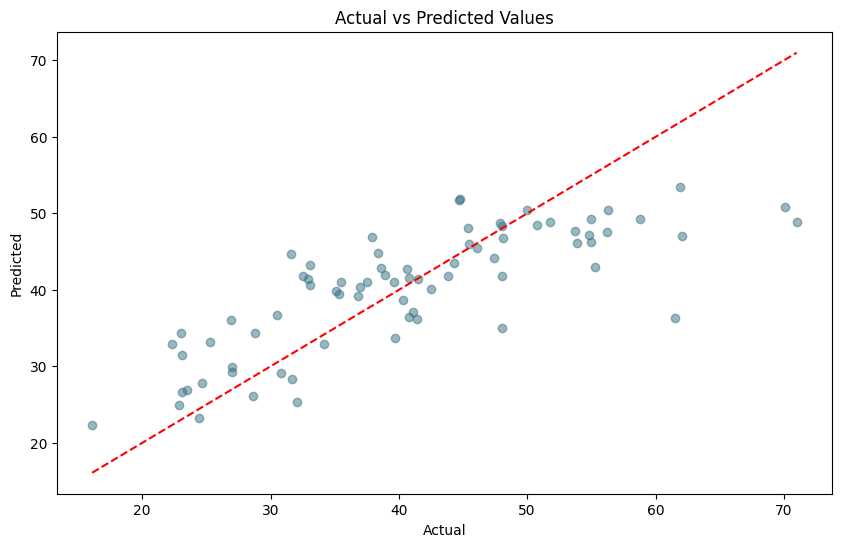

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(model_2_df['Actual'], model_2_df['Predicted'], alpha=0.5,color = "#367182")
plt.plot([model_2_df['Actual'].min(), model_2_df['Actual'].max()], [model_2_df['Actual'].min(), model_2_df['Actual'].max()], 'r--')  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### Model 3 - XGBRegressor

In [ ]:
model_3 = XGBRegressor()
model_3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predict for train data
y_pred_train_xg = model_3.predict(X_train)
y_pred_train_xg = y_pred_train_xg.reshape(-1,1)
y_pred_train_xg = scaler_y.inverse_transform(y_pred_train_xg)

In [ ]:
#predict test data
y_pred_test_xg = model_3.predict(X_test)
y_pred_test_xg = y_pred_test_xg.reshape(-1,1)
y_pred_test_xg = scaler_y.inverse_transform(y_pred_test_xg)

In [ ]:
#comparing the metrics for train and test

mse_for_train = mean_squared_error(y_train_og, y_pred_train_xg)
mse_for_test = mean_squared_error(y_test, y_pred_test_xg)
mae_train = mean_absolute_error(y_train_og, y_pred_train_xg)
mae_test = mean_absolute_error(y_test, y_pred_test_xg)
r2 = r2_score(y_test, y_pred_test_xg)

n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features (1 in this case)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))



print("Mean Squared Error for train:", mse_for_train)    ### To check if the model is underfitting or overfitting
print("Mean Squared Error for test:", mse_for_test)
print(f"MAE for train: {mae_train:.2f}")
print(f"MAE for test: {mae_test:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"Adjusted R-Squared {adjusted_r2:.2f}")

Mean Squared Error for train: 1.8537122649247995
Mean Squared Error for test: 38.99810110948874
MAE for train: 0.46
MAE for test: 4.67
R-Squared: 0.73
Adjusted R-Squared 0.70


In [ ]:
model_3_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test_xg.ravel()})

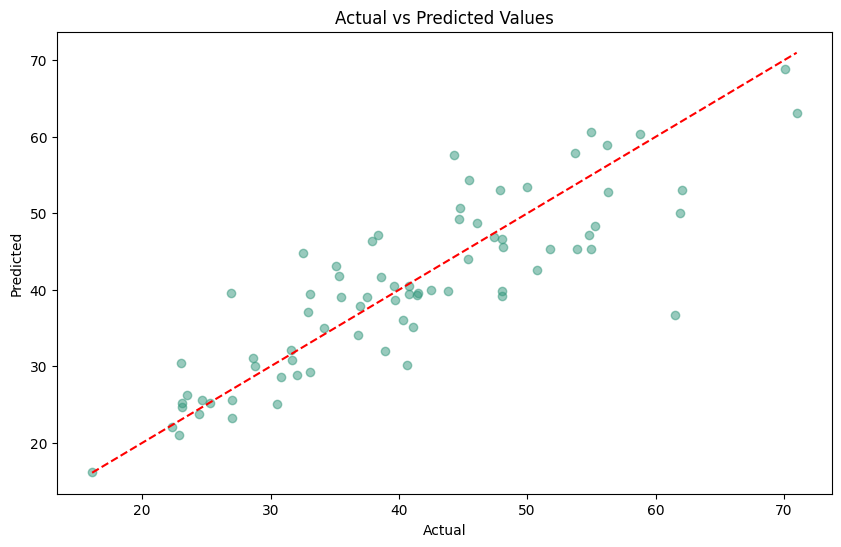

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(model_3_df['Actual'], model_3_df['Predicted'], alpha=0.5,color = "#33977c")
plt.plot([model_3_df['Actual'].min(), model_3_df['Actual'].max()], [model_3_df['Actual'].min(), model_3_df['Actual'].max()], 'r--')  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
model_3 = XGBRegressor()
from sklearn.model_selection import  GridSearchCV
# Define the parameter grid
'''param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 2, 5, 10]
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)'''
best_params = {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 0.7}

model_3_new = XGBRegressor(**best_params)
model_3_new.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predict for train data
y_pred_train_xg_new = model_3_new.predict(X_train)
y_pred_train_xg_new = y_pred_train_xg_new.reshape(-1,1)
y_pred_train_xg_new = scaler_y.inverse_transform(y_pred_train_xg_new)

In [ ]:
#predict test data
y_pred_test_xg_new = model_3_new.predict(X_test)
y_pred_test_xg_new = y_pred_test_xg_new.reshape(-1,1)
y_pred_test_xg_new = scaler_y.inverse_transform(y_pred_test_xg_new)

In [ ]:
#comparing the metrics for train and test

mse_for_train = mean_squared_error(y_train_og, y_pred_train_xg_new)
mse_for_test = mean_squared_error(y_test, y_pred_test_xg_new)
mae_train = mean_absolute_error(y_train_og, y_pred_train_xg_new)
mae_test = mean_absolute_error(y_test, y_pred_test_xg_new)
r2 = r2_score(y_test, y_pred_test_xg_new)

n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features (1 in this case)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))



print("Mean Squared Error for train:", mse_for_train)    ### To check if the model is underfitting or overfitting
print("Mean Squared Error for test:", mse_for_test)
print(f"MAE for train: {mae_train:.2f}")
print(f"MAE for test: {mae_test:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"Adjusted R-Squared {adjusted_r2:.2f}")

Mean Squared Error for train: 16.601069263950507
Mean Squared Error for test: 38.04182683586257
MAE for train: 2.99
MAE for test: 4.68
R-Squared: 0.74
Adjusted R-Squared 0.71


In [ ]:
model_3_new_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test_xg_new.ravel()})

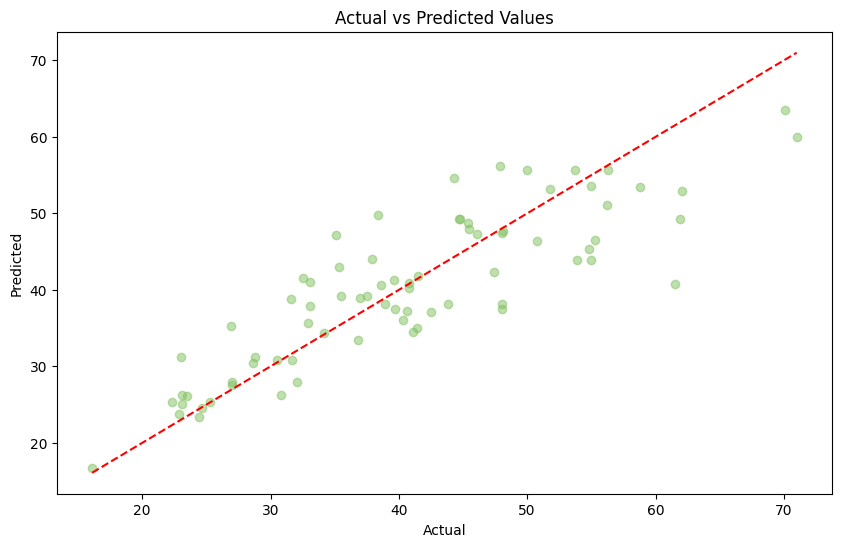

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(model_3_new_df['Actual'], model_3_new_df['Predicted'], alpha=0.5,color = "#80c161")
plt.plot([model_3_new_df['Actual'].min(), model_3_new_df['Actual'].max()], [model_3_new_df['Actual'].min(), model_3_new_df['Actual'].max()], 'r--')  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### Comparing Performance of each model

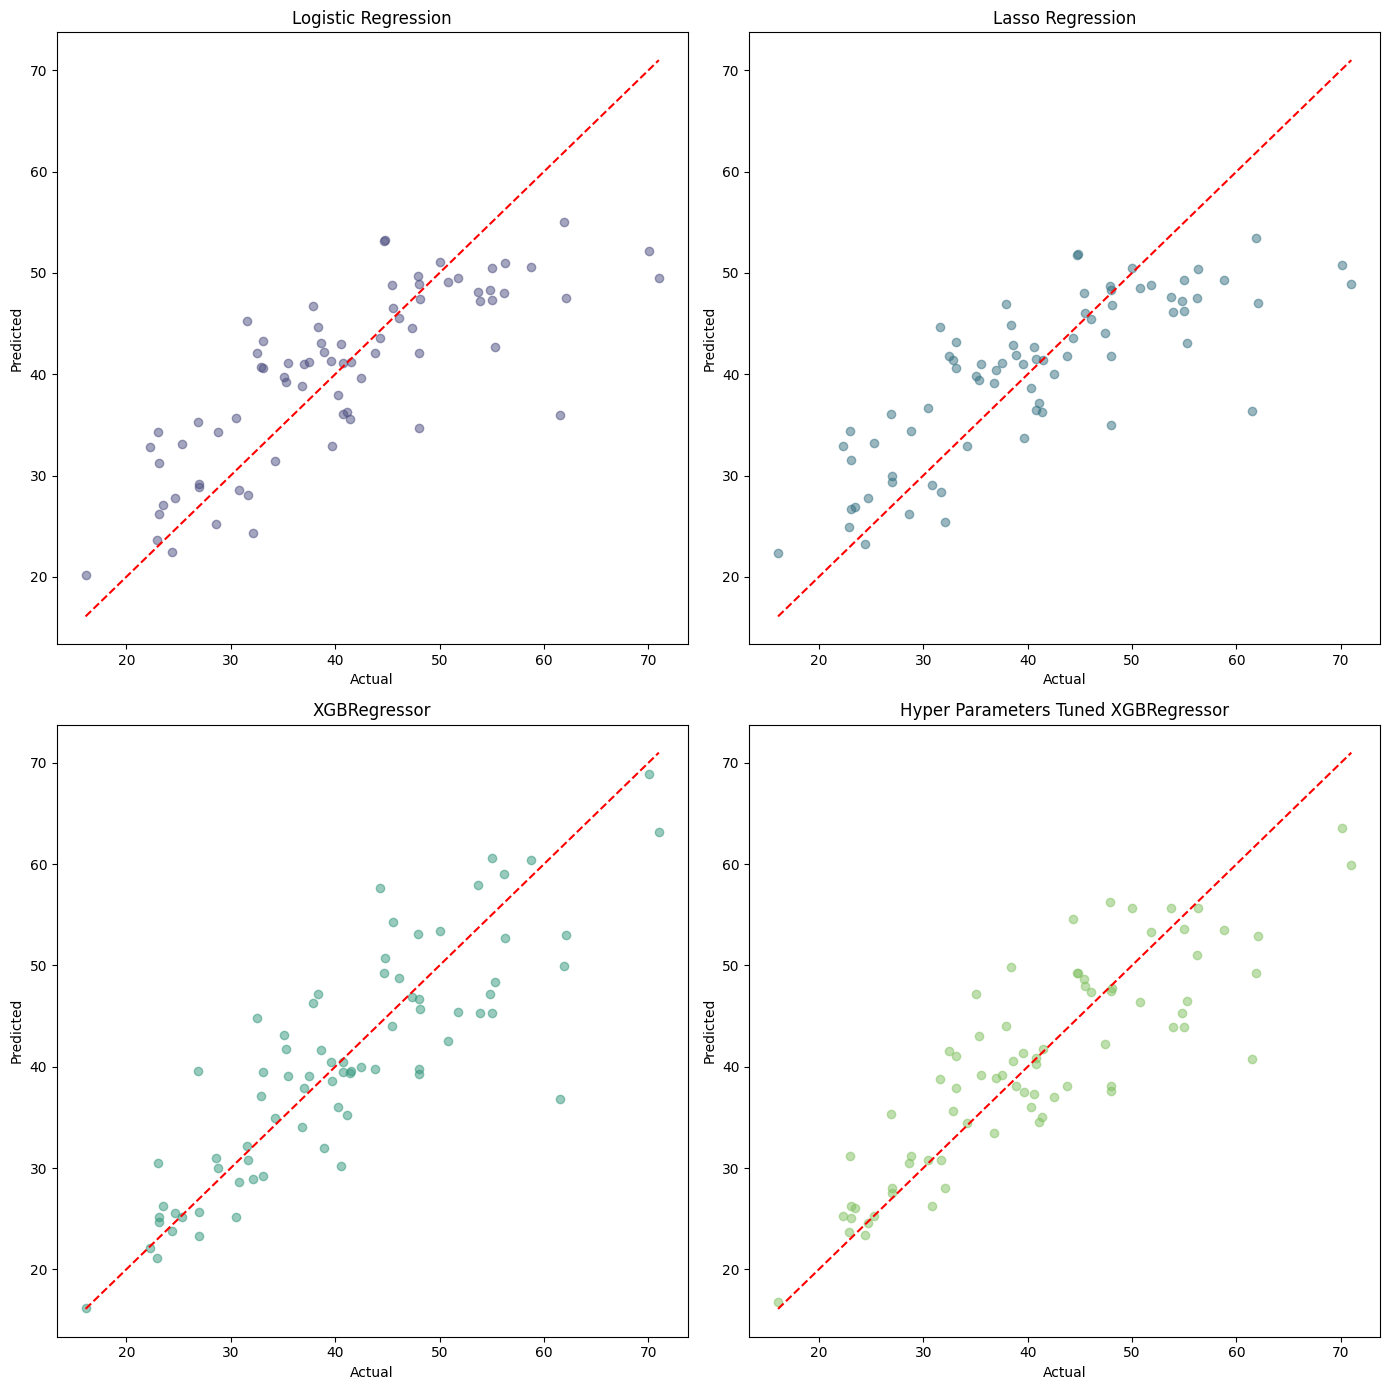

In [ ]:
# Plotting the scatter plots
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
plt.scatter(model_1_df['Actual'], model_1_df['Predicted'], alpha=0.5, color = "#4a4c7e")
plt.plot([model_1_df['Actual'].min(), model_1_df['Actual'].max()], [model_1_df['Actual'].min(), model_1_df['Actual'].max()], 'r--')  # Line y=x
plt.title('Logistic Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(model_2_df['Actual'], model_2_df['Predicted'], alpha=0.5,color = "#367182")
plt.plot([model_2_df['Actual'].min(), model_2_df['Actual'].max()], [model_2_df['Actual'].min(), model_2_df['Actual'].max()], 'r--')  # Line y=x
plt.title('Lasso Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,3)
plt.scatter(model_3_df['Actual'], model_3_df['Predicted'], alpha=0.5,color = "#33977c")
plt.plot([model_3_df['Actual'].min(), model_3_df['Actual'].max()], [model_3_df['Actual'].min(), model_3_df['Actual'].max()], 'r--')  # Line y=x
plt.title('XGBRegressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,4)
plt.scatter(model_3_new_df['Actual'], model_3_new_df['Predicted'], alpha=0.5,color = "#80c161")
plt.plot([model_3_new_df['Actual'].min(), model_3_new_df['Actual'].max()], [model_3_new_df['Actual'].min(), model_3_new_df['Actual'].max()], 'r--')  # Line y=x
plt.title('Hyper Parameters Tuned XGBRegressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()

plt.show()

In [ ]:
Metrics_df = pd.DataFrame({"Models":["Linear Regression", "Lasso Regression", "XGBRegressor", "Tuned XGBRegressor"],
                             "MSE_Train":[47.89, 48.42, 1.85, 16.77],
                             "MSE_test":[55.41, 57.2, 38.99, 38.3],
                             "MAE_train":[5.07, 5.08, 0.46, 3.01],
                             "MAE_test":[5.75, 5.81, 4.67, 4.72],
                             "R-Squared":[62, 60, 73, 73],
                             "Adjusted_R-Squared":[58, 56, 70, 71]
                             })

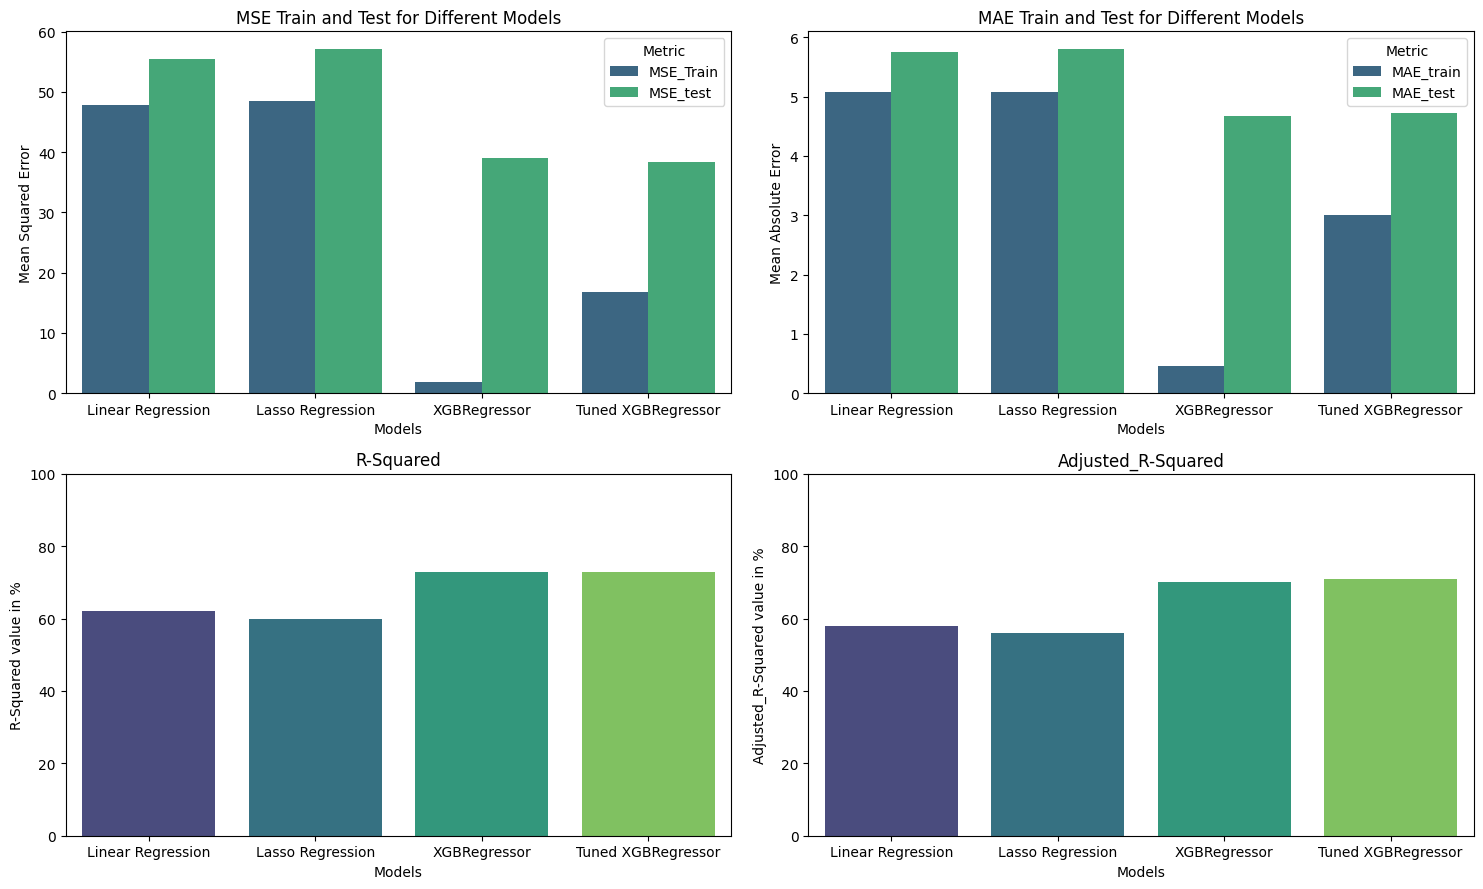

In [ ]:
# Plotting the bar plots
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)

# Melt the DataFrame
melted_df_1 = Metrics_df.melt(id_vars='Models', value_vars=['MSE_Train', 'MSE_test'], var_name='Metric', value_name='Value')

# Create the barplot
sns.barplot(data=melted_df_1, x='Models', y='Value', hue='Metric', palette='viridis')
plt.title('MSE Train and Test for Different Models')
plt.ylabel('Mean Squared Error')

plt.subplot(2,2,2)

# Melt the DataFrame
melted_df_2 = Metrics_df.melt(id_vars='Models', value_vars=['MAE_train', 'MAE_test'], var_name='Metric', value_name='Value')

# Create the barplot
sns.barplot(data=melted_df_2, x='Models', y='Value', hue='Metric', palette='viridis')
plt.title('MAE Train and Test for Different Models')
plt.ylabel('Mean Absolute Error')

plt.subplot(2,2,3)
# Create the barplot
sns.barplot(data=Metrics_df, x='Models', y='R-Squared', hue='Models', palette='viridis')
plt.title('R-Squared')
plt.ylim(0,100)
plt.ylabel('R-Squared value in %')

plt.subplot(2,2,4)
# Create the barplot
sns.barplot(data=Metrics_df, x='Models', y='Adjusted_R-Squared', hue='Models', palette='viridis')
plt.title('Adjusted_R-Squared')
plt.ylim(0,100)
plt.ylabel('Adjusted_R-Squared value in %')

plt.tight_layout()
plt.show()


### Important Features

Below are the all the Features and their importance in Model performance and prediction.

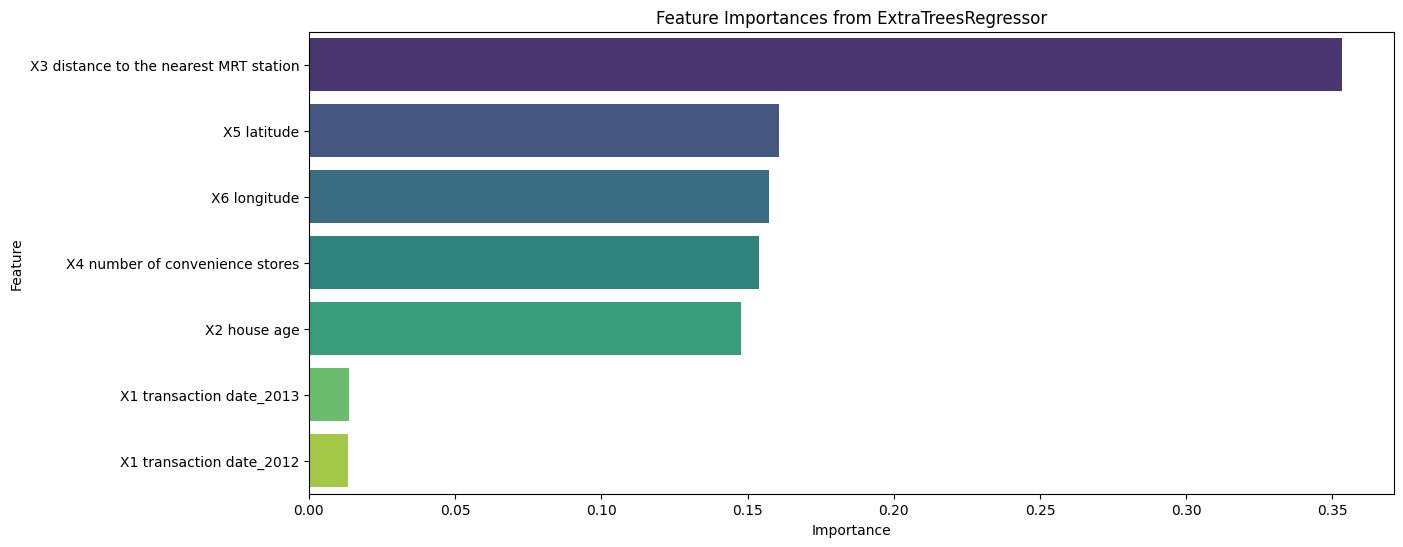

In [ ]:
# Initialize the ExtraTreesRegressor model
extra_tree_forest = ExtraTreesRegressor(n_estimators=500, criterion='squared_error', max_features=4)

# Train the model on the training data
extra_tree_forest.fit(X_train, y_train)

# Compute the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Display feature importance
# print("Feature Importances:", feature_importance)

feature_names = X.columns
# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df,hue='Feature', palette='viridis')
plt.title('Feature Importances from ExtraTreesRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Conclusion

From the charts above, it is evident that the XGBRegressor and Hyperparameter Tuned XGBRegressor are the best-performing models in predicting values. The scatterplot shows that both models are making accurate predictions. Additionally, their metrics indicate lower MSE and MAE values and higher R-Squared and Adjusted R-Squared values, which are desirable. However, the XGBRegressor exhibits a significant difference between the training and test metrics, indicating overfitting. In contrast, the Tuned XGBRegressor balances both, making it the best model compared to the others. Therefore, the Hyperparameter Tuned XGBRegressor is the best model for this project.
